In [6]:
import sys; sys.path.append('../')

In [7]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(0)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    max_tokens=5000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


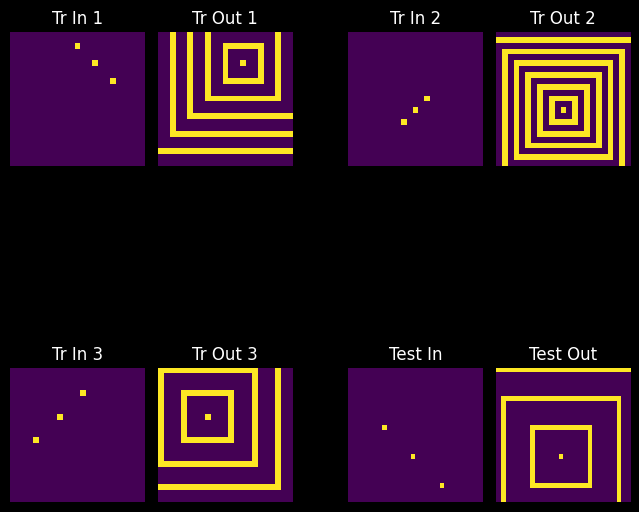

In [8]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLUFocus,MLU

mlu = MLUFocus(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer betwe
                    en 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the spatial 
                    transformation rules, logic, pattern and concept of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.4-focus.trail1",
    compress_knowledge=False,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [5]:
from train_test_helper import train_and_evaluate

from logical_agents import (logic_concept_reasoning_network,
                            pattern_based_logical_reasoning_network)

reasoning_iterations=4
reasoning_agent=lambda prompt,input: pattern_based_logical_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)
# reasoning_agent=None
set_live_verbosity(0)

n = 100
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)


Starting Epoch 1



Training:   0%|          | 0/100 [00:00<?, ?it/s]Delete of nonexisting embedding ID: 1d3cfb49-4d7d-471a-9319-70fdf8dcdd24
Delete of nonexisting embedding ID: b94cc481-4d88-441e-85bc-133b31a8bf12
Delete of nonexisting embedding ID: 1b8af8a6-8ea1-4d5f-824b-7af1968b1d9b
Delete of nonexisting embedding ID: a73dcd85-8975-4259-95c1-d8d6fa9505d4
Delete of nonexisting embedding ID: f0889a72-f2e8-40a4-ad4a-3208a1dd077c
Delete of nonexisting embedding ID: 0b6103a7-e0fe-48c5-9cb6-2747fd19d36e
Delete of nonexisting embedding ID: 4d2cdc0c-7e72-4d55-9cab-84f12e25b409
Delete of nonexisting embedding ID: bf30e96b-7fd1-4c6a-8d78-3498701a6877
Delete of nonexisting embedding ID: c15125c1-6fa1-4855-aaa1-ae3424e08862
Delete of nonexisting embedding ID: cd38991e-3f5a-43e9-8bdf-90cb6b4d39d8
Delete of nonexisting embedding ID: c30fec99-103f-4398-aebc-01d77d7dbcc3
Delete of nonexisting embedding ID: 2c7a4816-3850-4654-b9e0-e6e693fff3a7
Delete of nonexisting embedding ID: e305117e-f52a-4067-b2a2-a56ae7c14035
De

Iteration: 1 - Pattern Extraction


Training:   0%|          | 0/100 [00:41<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
mlu.print_knowledge_base()

General Knowledge Base:

Entry 1: **Guidelines for Spatial Relationship Preservation**:  
To ensure that spatial arrangements are effectively preserved when constructing the output grid from the input 
grid, adhere to the following criteria:  
  
1. **Relative Positioning**: When transforming the input grid to the output grid, maintain the relative positions 
of elements. For example, if a cell in the input grid is adjacent to another, their positions in the output grid 
should reflect the same adjacency unless transformation rules dictate otherwise.  
  
2. **Proportional Scaling**: When resizing the output grid, use proportional scaling methods that maintain the 
aspect ratio of the input grid. This ensures that the distances and relationships between elements remain 
consistent.  
  
3. **Pattern Adherence**: When deriving transformation rules from previous examples, identify common patterns. 
Apply these patterns consistently to ensure that the transformation from input to output reflects similar 
structural relationships as observed in historical data.  
  
4. **Boundary Preservation**: Maintain clear boundaries between different regions or elements in the grid. This 
includes ensuring that any transitions or changes between different areas remain visible and are respected in both 
input and output grids.  
  
5. **Inversion and Rotation Rules**: If transformations involve inverting or rotating the grid, apply these 
transformations carefully to maintain spatial relationships. Clearly define how each transformation affects the 
grid layout and ensure that these extensions keep the integrity of spatial relationships intact.  
  
6. **Cell Content Relationships**: Ensure that the logical relationships between the contents of cells (e.g., 
colors, symbols) are preserved. If two cells are significantly related based on prior examples, this relationship 
should be evident in the output grid as well.  
  
7. **Consistent Use of Transformation Logic**: Establish clear transformation rules based on the guidelines above 
and ensure they are documented and utilized consistently across trials. This allows for replicability and adherence
to spatial characteristics observed in the training data.  
  
By adhering to these guidelines, it enhances the alignment of the output grid with established patterns and spatial
arrangements observed in previous transformation examples, leading to more reliable and interpretable outputs.

Entry 2: Clustering and visual integrity are paramount considerations when constructing output grids based on the 
transformation of input grids. As we work to predict the final image matrices, special attention must be paid to 
integer clusters—groupings of related integers that should be visually and spatially preserved. Here are several 
guidelines for ensuring the integrity of these clusters in the output grids:

1. **Identification of Clusters**: Use algorithms to detect clusters of integers within the input grid. These can 
include k-means clustering or spatial relationship analysis to pinpoint groups of integers that belong together.

2. **Preservation Principles**: 
   - Maintain the proximity of clustered integers in the transformed output grid to reflect their relationships 
accurately.
   - Avoid transformations that could lead to the merging of distinct clusters or the separation of related 
integers unless strategically planned.

3. **Visualization Techniques**:
   - Utilize color coding or shading to differentiate clusters visually. Each unique cluster can be represented by 
a distinct color to enhance interpretability.
   - Ensure consistency in the representation of clusters across different trials to facilitate comparison and 
analysis.

4. **Transformation Rules**: When applying transformations, establish clear rules that respect the integrity of 
these clusters. For example, if a transformation involves scaling or rotation, ensure that the resulting positions 
of the integers maintain their original relationships.

5. **Feedback and Iteration**: Post-transformation, analyze the output grids for visual integrity and cluster 
preservation. Use feedback loops to adjust guidelines based on observed outcomes, refining the methods for future 
tasks.
   
By leveraging these guidelines, we ensure that the output grids not only represent the transformed integers 
accurately but also uphold the visual and spatial integrity essential for effective data interpretation and 
analysis.

Entry 3: **Robust Evaluation Criteria**: To effectively evaluate output grids against expected results, the 
following criteria should be established:

1. **Clustering Analysis**: This involves assessing how well the output grid clusters similar symbols (integers 
between 0 and 9, visualized as colors). Effectiveness can be measured by the homogeneity of clusters and their 
correspondence to expected groupings derived from input grids.

2. **Positioning Accuracy**: This criterion examines the precision of the placement of symbols within the output 
grid. It evaluates whether the spatial arrangement aligns with the transformation rules deduced from the 
input-output examples.

3. **Overall Structural Integrity**: This assesses the coherence and organization of the output grid as a whole. A 
structurally sound output should demonstrate logical consistency with the input matrix transformations, ensuring 
that no symbols are misplaced or erratically positioned.

4. **Comprehensive Assessment**: Each of the above points should contribute to an overall evaluation framework that
fosters a detailed understanding of transformation effectiveness. By rigorously analyzing these criteria, one can 
determine the quality and accuracy of the derived output grids, identifying areas for potential improvement in the 
transformation logic and application.

Entry 4: Proactive quality assurance improves output quality by ensuring consistent value representation and proper
cluster arrangement. A structured framework for continuous inspection can detect anomalies early in the output 
generation process, facilitating timely corrections and enhancing the reliability of final output quality.

Entry 5: Gradual transitions in value transformations are essential for improving the visual representation of 
data. They help prevent abrupt changes that can lead to confusion or misinterpretation of the outputs, thereby 
making the resulting visuals more interpretable and aesthetically pleasing. This technique is especially beneficial
in areas where similar values are clustered, as it maintains a smooth flow and enhances the overall understanding 
of the data's distribution and patterns.

Entry 6: The proximity analysis of integers within input grids plays a crucial role in ensuring output accuracy. A 
key principle to follow is that values that are densely packed in the input grid should reflect that clustering in 
the resulting output grid. This guideline serves as a cornerstone for the transformation process, aiming to 
accurately represent density patterns observed in input configurations. By focusing on how integer values are 
grouped, one can enhance the fidelity of the output grids as they relate to their corresponding input grids. 
Understanding and applying these clustering principles will aid in achieving precise and logical visual 
representations in the final output.

Entry 7: To construct output grids from input grids effectively, it is essential to understand transformation 
patterns that influence the relationship between spatial arrangements of integers. By analyzing given examples, we 
can identify how integer clusters interact and impact the final output. This understanding is particularly relevant
in image processing and matrix-based tasks where these transformation rules guide grid construction. In preparing 
output grids, we must focus on the height and width selection, as well as the symbols used to fill each cell, 
ranging from integers 0 to 9, which can be represented with distinct colors. The goal is to generalize learned 
patterns and logic from provided examples to predict outputs for new test images or matrices, applying learned 
spatial rules consistently to enhance the accuracy of the constructed output grids.

Entry 8: Maintaining the integrity of integer clusters throughout transformations is crucial for accurately 
reflecting the spatial relationships present in the input grid. When constructing the output grid, clusters of 
similar integers should remain close together to ensure that their relative positioning is preserved. This 
principle is especially significant in visual representation tasks, where the proximity and arrangement of similar 
numbers can influence how the final output is perceived. Thus, understanding and applying this clustering principle
is imperative when analyzing examples and generating output grids for test input images.

Entry 9: To effectively construct output grids corresponding to test input grids, it is essential to implement 
systematic trial and error approaches. This involves conducting three trials for each test input to gather diverse 
outcomes. Documenting adjustments and iterations during each trial enables continuous improvement, allowing us to 
refine our transformation logic based on observed feedback. By analyzing these iterative transformations, we can 
learn the underlying spatial transformation rules, logic, and patterns necessary to predict and accurately fill in 
the final output grid with appropriate symbols, thereby enhancing our ability to respond to future tasks more 
effectively.

Entry 10: When constructing output grids from input grids, it is crucial to integrate a dedicated step for 
iterative testing. This involves implementing a feedback loop that allows for real-time comparison of generated 
outputs against expected results. If discrepancies are found, the transformation process should be adjusted 
accordingly. This iterative approach ensures continuous refinement of the algorithm and helps to improve accuracy 
over trials. Furthermore, utilizing this feedback mechanism can guide learning from previous examples, allowing for
better understanding of the transformation rules and logic necessary to apply to the final test image matrix.

Entry 11: ### Cluster Identification Techniques for Integer Grids

1. **Overview of Cluster Detection**  
   - **Definition**: Cluster detection involves identifying groups of adjacent cells with similar values in an 
integer grid. 
   - **Importance**: Recognizing these clusters is crucial for understanding the structure of the grid and applying
relevant transformations based on these patterns.

2. **Methods for Detecting Clusters**  
   - **Depth-First Search (DFS)**: This method can be used to explore all the connected components in the grid, 
marking cells as part of a cluster when they are adjacent and share the same value.  
     - **Steps**:  
       1. Iterate through each cell in the grid.  
       2. If the cell is not visited and is part of a cluster, initiate a DFS to mark all connected cells.  
       3. Store the cluster information for further analysis.
   - **Breadth-First Search (BFS)**: Similar to DFS but utilizes a queue to explore all neighboring cells 
level-by-level, which can be implemented for detecting clusters.  
   - **Union-Find Algorithm**: This data structure can optimize the process of finding and merging clusters by 
maintaining a representation of the grid's components dynamically.  

3. **Applications in Transformations**  
   - Understanding cluster locations and sizes guides how to apply transformations effectively. For example, 
clusters could be replaced with average values, or highlighted in visualizations.  
   -  Strategies for transformations based on clustering include resizing or cropping to focus on significant 
distributions of integers.

4. **Considerations**  
   - Ensure efficient traversal and marking of cells to prevent redundant checks.  
   - Clusters can vary in shape and size, hence flexibility in the detection logic is essential for various grid 
configurations.

### Conclusion
The use of clustering identification techniques can significantly enhance the analysis of integer grids, especially
when their structure has direct implications for transformations applied to the data. This knowledge forms the 
basis for developing more complex algorithms to implement the main goal of constructing output grids efficiently.

Entry 12: Iterative trials play a crucial role in refining output grids by enabling gradual enhancements informed 
by feedback. This approach ensures that the outputs progressively align with the expected results, capitalizing on 
learned spatial transformation rules and logic from previous iterations. Iterative methods are particularly 
beneficial in scenarios demanding high precision, facilitating continuous improvement and adaptability in the 
construction of output grids corresponding to test input grids. This iterative feedback loop not only boosts 
accuracy but also fosters a deeper understanding of the underlying transformation rules and patterns to be applied 
in subsequent trials.

Entry 13: Clustering integrity during output construction is crucial for maintaining a clear visualization and 
understanding of data patterns. This ensures that transformation rules and logic derived from given examples remain
consistent and accurately reflect the intended spatial relationships. By preserving cluster integrity, the outputs 
can effectively convey the underlying structure of the input data, making it easier to analyze and interpret.

Entry 14: To effectively document the transformation logic for constructing output grids from input grids, it is 
essential to follow a structured approach: 1. **Initial Instructions Overview**: Summarize the transformation rules
and methodologies that guide the process of translating input grids to output grids, ensuring clarity in the 
initial instructions provided. 2. **Input-Output Relationship**: Analyze the relationship between input grids and 
their corresponding output grids. For each input, detail the changes observed in the output, noting how specific 
transformations were applied. 3. **Discrepancy Analysis**: Conduct evaluations of any discrepancies found during 
transformations. Document instances where the expected outcomes did not align with the actual output, exploring the
potential causes for these discrepancies. 4. **Feedback Integration**: Utilize feedback received during evaluations
to refine transformation methodologies. Outline how feedback is incorporated into the documentation to improve 
future transformations. 5. **Continuous Improvement Cycle**: Establish a cycle for ongoing documentation updates 
based on the learning gained from each trial and feedback session. This ensures the transformation logic evolves 
and improves over time, leading to more accurate outputs. By maintaining thorough records of these processes, it 
will be possible to enhance the understanding of transformation logic and apply it effectively in constructing 
output grids in future tasks, building a knowledge base that supports continuous improvement.

Entry 15: To define a clear methodology for assessing integer adjacency in the context of clustering from an input 
grid, the following steps should be established:

1. **Definition of Adjacency**:  
   - Define what constitutes adjacency for integers in the grid. Commonly, adjacency could be determined in four 
possible directions: up, down, left, and right (4-connectivity). Alternatively, diagonal connections could also be 
included for an 8-connectivity model.

2. **Distance Measurement**:  
   - Establish a clear numeric range that determines how close two integers must be to be considered adjacent. For 
instance, integers that differ by 1 could be classified as adjacent, while larger differences might not.

3. **Cluster Formation Criteria**:  
   - Set criteria based on the defined adjacency rules for how clusters of integers will be formed. A minimum 
threshold of adjacent integers should be required to form a cluster.
   - For example, a group of at least three adjacent integers could be considered the minimum cluster size.

4. **Visual Representation**:  
   - Create visual aids to represent clustering based on adjacency definitions to help identify and verify clusters
in practice.
   - Utilizing color coding can help highlight clusters based on adjacency.

5. **Standardized Testing**:  
   - Develop standard test cases using input grids containing known clusters to validate the adjacency assessment 
methodology. This includes grids with clear adjacency examples and others with mixed arrangements to challenge the 
criteria.

6. **Iterative Improvement**: 
   - Incorporate feedback from the application of the methodology to improve clustering criteria and definitions, 
ensuring they remain rigorous yet flexible enough to be applicable across various types of grids.

7. **Documentation**:  
   - Maintain thorough documentation of the methodology and the reasoning behind any decisions made regarding 
adjacency and clustering criteria.

By following this structured methodology, it will be possible to assess integer adjacency rigorously and ensure 
that any identified clusters truly reflect the proximity intended from the input grids.

Entry 16: In Integer Cluster Recognition and Maintenance, adherence to observed transformation rules is crucial for
accurate output generation. This involves:

1. **Strict Observation of Transformation Rules**: All transformation rules derived from examples must be adhered 
to strictly. Any deviation can lead to inaccuracies in the results.

2. **Maintaining Integrity of Integer Clusters**: When constructing output grids, it’s vital to preserve the 
integrity of integer clusters. This means recognizing how numbers cluster together in the input grid and reflecting
that accurately in the output grid.

3. **Understanding Spatial Relationships**: Pay close attention to the spatial relationships between cells in input
and output grids. Understanding these relationships will guide the transformation process and help maintain 
consistency across the grids.

4. **Accurate Observation**: Regularly review and analyze the relationships and transformations observed in 
previous tasks to create a comprehensive understanding that aids in future outputs. 

By reinforcing these guidelines, we can ensure that integer clusters are correctly recognized and maintained, 
leading to reliable output generations across various tasks.

Entry 17: Gradual value transitions enhance the visual coherence of output grids, contributing significantly to 
improved aesthetics and effective communication of underlying transformations. Implementing smooth transitions 
among grid values can play a crucial role in data visualization tasks. This practice not only makes the grid 
visually appealing but also facilitates better understanding of the data patterns and transformation logic present 
in the grid.

Entry 18: ## Key Concepts for Transformational Accuracy
1. **Preservation of Spatial Clusters**: The effectiveness of the transformation trials hinges on maintaining the 
spatial relationships between integer clusters in the input grids. This involves ensuring that areas with similar 
values remain adjacent in the output grid post-transformation.

2. **Proximity Consideration**: During the transformation process, attention must be given to how close or far 
apart values are within the input grid. Cluster integrity can be affected by transformations that alter these 
proximities, leading to inaccurate final output grids.

3. **Iterative Feedback Loop**: Each trial should act as a feedback mechanism. Analyzing the results of previous 
trials will allow for adjustments to be made to improve accuracy in subsequent trials. Iteration is key to refining
the transformation rules and logic applied.

4. **Transformation Rules**: Develop rules that govern how clusters are reshaped or restructured into the output 
grid. These rules should be based on patterns observed in trials that yield successful predictions.

5. **Validation of Predictions**: Post-transformation, it is crucial to validate that the output grid corresponds 
well with expected spatial relationships from the input grid. Implement a method for assessment of the 
transformation accuracy based on cluster integrity.

## Objectives for Effective Image Construction
- Aim to maximize consistency in cluster formations across trials.
- Ensure that transformations remain true to the original arrangement of integers, reflecting familiar spatial 
configurations.
- Analyze discrepancies in predicted versus actual outcomes to refine transformation approaches further.
- Gather data systematically from each trial to inform future transformations, creating a repository of successful 
strategies and pitfalls.

Entry 19: ### Task Overview:
The primary goal is to generate output grids from provided input grids by understanding and applying transformation
rules and logic derived from past examples. The focus is on spatial integrity, clustering of integer values, and 
maintaining relationships between integers within the grids.

### Detailed Steps:
1. **Input Grid Analysis**: Dissecting the input grid to pinpoint how spatial transformations occur, particularly 
how clusters of integers are positioned and maintain their relationships.

2. **Output Grid Dimensions**: Determining the necessary height and width adhering to the input grid dimensions 
while ensuring structural integrity during transformation transitions.

3. **Output Grid Population**: Filling the output grid cells with integers (0-9) that accurately reflect the 
transformed characteristics, aligning with visual logic observed in previous transformations.

4. **Multiple Trials**: Conducting three iterative trials for each input grid to enhance the accuracy of 
predictions by learning from outcomes in earlier attempts. Documenting each successive transformation process.

5. **Outcome Documentation and Analysis**: Maintaining thorough records of transformation processes, reviewing 
their effectiveness, and making necessary adjustments based on discrepancies. This aims to fine-tune approaches in 
subsequent trials.

### Key Knowledge Points:
- **Emphasis on Clustering Integrity**: Understanding how integers group is essential for maintaining output 
accuracy. Key clusters must reflect in the final representations.
- **Techniques for Value Proximity Preservation**: Implementing methods to ensure similar values maintain their 
proximity during the transformations.
- **Guidance from Past Examples**: Analyzing prior transformation configurations to identify variables that 
consistently influence output shapes and relationships, enabling more effective application of transformation 
rules.

### Performance Review & Feedback Analysis:
The transformation outcome for the provided image did not meet expectations. The discrepancies noted were:
- **Cluster Integrity Compromised**: The final output failed to keep the integer clusters intact, leading to 
disordered spatial relations.
- **Deviation from Expected Patterns**: Alterations to integer values such as '5' and '3' did not adhere to 
established patterns, affecting overall outcome fidelity.
- **Iterative Approach Lacking**: There was no evidence of using iterative trials or feedback to refine the 
outputs, which suggests a need for systematic enhancement in future tasks.

The shortcomings indicate areas for improvement in maintaining spatial relationships, integer clustering, and 
effectively applying learned transformation logic across multiple trials.

Entry 20: Utilizing cluster detection algorithms, such as Breadth-First Search (BFS) and Depth-First Search (DFS), 
significantly improves the identification of integer groups in grids. This is essential for effectively maintaining
spatial relationships during transformations. These algorithms should be consistently applied whenever changes to 
the grid are required to ensure accurate outcomes in the output grid construction process. By identifying clusters,
one can better understand the transformation logic and spatial rules that govern the mapping of input grids to 
output grids, which is integral to achieving the main goal of this task.

Entry 21: **Feedback-Driven Refinement** is a critical phase in the process of constructing output grids. It 
involves the following steps:

1. **Feedback Mechanism**: Establish a structured method for gathering feedback after each trial. This can include 
predefined questions about the accuracy of the grid outputs, qualitative assessments, or automated metrics that 
compare the output with expected results.

2. **Adjustment Protocols**: Utilize the feedback obtained to make real-time adjustments to the transformation 
processes. This may involve recalibrating parameters that govern the logic and spatial arrangements used when 
filling the output grids.

3. **Clustering Integrity**: Ensure that the feedback loop also focuses on maintaining the clustering integrity of 
the output grids. This involves evaluating whether similar patterns remain grouped together and whether the 
transformation rules used align with the intended visual representations.

4. **Iteration**: Cycle through this feedback-driven process multiple times for each test input, refining the 
approach with each iteration to enhance accuracy and visual conformity in the resulting grids. 

5. **Documentation**: Documenting feedback outcomes and the modifications made will help in learning and future 
reference, ensuring that the process evolves iteratively and retains cumulative knowledge over time.

Prompt Knowledge Base:

Entry 1: **Guidelines for Spatial Relationship Preservation**:  
To ensure that spatial arrangements are effectively preserved when constructing the output grid from the input 
grid, adhere to the following criteria:  
  
1. **Relative Positioning**: When transforming the input grid to the output grid, maintain the relative positions 
of elements. For example, if a cell in the input grid is adjacent to another, their positions in the output grid 
should reflect the same adjacency unless transformation rules dictate otherwise.  
  
2. **Proportional Scaling**: When resizing the output grid, use proportional scaling methods that maintain the 
aspect ratio of the input grid. This ensures that the distances and relationships between elements remain 
consistent.  
  
3. **Pattern Adherence**: When deriving transformation rules from previous examples, identify common patterns. 
Apply these patterns consistently to ensure that the transformation from input to output reflects similar 
structural relationships as observed in historical data.  
  
4. **Boundary Preservation**: Maintain clear boundaries between different regions or elements in the grid. This 
includes ensuring that any transitions or changes between different areas remain visible and are respected in both 
input and output grids.  
  
5. **Inversion and Rotation Rules**: If transformations involve inverting or rotating the grid, apply these 
transformations carefully to maintain spatial relationships. Clearly define how each transformation affects the 
grid layout and ensure that these extensions keep the integrity of spatial relationships intact.  
  
6. **Cell Content Relationships**: Ensure that the logical relationships between the contents of cells (e.g., 
colors, symbols) are preserved. If two cells are significantly related based on prior examples, this relationship 
should be evident in the output grid as well.  
  
7. **Consistent Use of Transformation Logic**: Establish clear transformation rules based on the guidelines above 
and ensure they are documented and utilized consistently across trials. This allows for replicability and adherence
to spatial characteristics observed in the training data.  
  
By adhering to these guidelines, it enhances the alignment of the output grid with established patterns and spatial
arrangements observed in previous transformation examples, leading to more reliable and interpretable outputs.

Entry 2: Clustering and visual integrity are paramount considerations when constructing output grids based on the 
transformation of input grids. As we work to predict the final image matrices, special attention must be paid to 
integer clusters—groupings of related integers that should be visually and spatially preserved. Here are several 
guidelines for ensuring the integrity of these clusters in the output grids:

1. **Identification of Clusters**: Use algorithms to detect clusters of integers within the input grid. These can 
include k-means clustering or spatial relationship analysis to pinpoint groups of integers that belong together.

2. **Preservation Principles**: 
   - Maintain the proximity of clustered integers in the transformed output grid to reflect their relationships 
accurately.
   - Avoid transformations that could lead to the merging of distinct clusters or the separation of related 
integers unless strategically planned.

3. **Visualization Techniques**:
   - Utilize color coding or shading to differentiate clusters visually. Each unique cluster can be represented by 
a distinct color to enhance interpretability.
   - Ensure consistency in the representation of clusters across different trials to facilitate comparison and 
analysis.

4. **Transformation Rules**: When applying transformations, establish clear rules that respect the integrity of 
these clusters. For example, if a transformation involves scaling or rotation, ensure that the resulting positions 
of the integers maintain their original relationships.

5. **Feedback and Iteration**: Post-transformation, analyze the output grids for visual integrity and cluster 
preservation. Use feedback loops to adjust guidelines based on observed outcomes, refining the methods for future 
tasks.
   
By leveraging these guidelines, we ensure that the output grids not only represent the transformed integers 
accurately but also uphold the visual and spatial integrity essential for effective data interpretation and 
analysis.

Entry 3: **Robust Evaluation Criteria**: To effectively evaluate output grids against expected results, the 
following criteria should be established:

1. **Clustering Analysis**: This involves assessing how well the output grid clusters similar symbols (integers 
between 0 and 9, visualized as colors). Effectiveness can be measured by the homogeneity of clusters and their 
correspondence to expected groupings derived from input grids.

2. **Positioning Accuracy**: This criterion examines the precision of the placement of symbols within the output 
grid. It evaluates whether the spatial arrangement aligns with the transformation rules deduced from the 
input-output examples.

3. **Overall Structural Integrity**: This assesses the coherence and organization of the output grid as a whole. A 
structurally sound output should demonstrate logical consistency with the input matrix transformations, ensuring 
that no symbols are misplaced or erratically positioned.

4. **Comprehensive Assessment**: Each of the above points should contribute to an overall evaluation framework that
fosters a detailed understanding of transformation effectiveness. By rigorously analyzing these criteria, one can 
determine the quality and accuracy of the derived output grids, identifying areas for potential improvement in the 
transformation logic and application.

Entry 4: Proactive quality assurance improves output quality by ensuring consistent value representation and proper
cluster arrangement. A structured framework for continuous inspection can detect anomalies early in the output 
generation process, facilitating timely corrections and enhancing the reliability of final output quality.

Entry 5: Gradual transitions in value transformations are essential for improving the visual representation of 
data. They help prevent abrupt changes that can lead to confusion or misinterpretation of the outputs, thereby 
making the resulting visuals more interpretable and aesthetically pleasing. This technique is especially beneficial
in areas where similar values are clustered, as it maintains a smooth flow and enhances the overall understanding 
of the data's distribution and patterns.

Entry 6: The proximity analysis of integers within input grids plays a crucial role in ensuring output accuracy. A 
key principle to follow is that values that are densely packed in the input grid should reflect that clustering in 
the resulting output grid. This guideline serves as a cornerstone for the transformation process, aiming to 
accurately represent density patterns observed in input configurations. By focusing on how integer values are 
grouped, one can enhance the fidelity of the output grids as they relate to their corresponding input grids. 
Understanding and applying these clustering principles will aid in achieving precise and logical visual 
representations in the final output.

Entry 7: To construct output grids from input grids effectively, it is essential to understand transformation 
patterns that influence the relationship between spatial arrangements of integers. By analyzing given examples, we 
can identify how integer clusters interact and impact the final output. This understanding is particularly relevant
in image processing and matrix-based tasks where these transformation rules guide grid construction. In preparing 
output grids, we must focus on the height and width selection, as well as the symbols used to fill each cell, 
ranging from integers 0 to 9, which can be represented with distinct colors. The goal is to generalize learned 
patterns and logic from provided examples to predict outputs for new test images or matrices, applying learned 
spatial rules consistently to enhance the accuracy of the constructed output grids.

Entry 8: Maintaining the integrity of integer clusters throughout transformations is crucial for accurately 
reflecting the spatial relationships present in the input grid. When constructing the output grid, clusters of 
similar integers should remain close together to ensure that their relative positioning is preserved. This 
principle is especially significant in visual representation tasks, where the proximity and arrangement of similar 
numbers can influence how the final output is perceived. Thus, understanding and applying this clustering principle
is imperative when analyzing examples and generating output grids for test input images.

Entry 9: To effectively construct output grids corresponding to test input grids, it is essential to implement 
systematic trial and error approaches. This involves conducting three trials for each test input to gather diverse 
outcomes. Documenting adjustments and iterations during each trial enables continuous improvement, allowing us to 
refine our transformation logic based on observed feedback. By analyzing these iterative transformations, we can 
learn the underlying spatial transformation rules, logic, and patterns necessary to predict and accurately fill in 
the final output grid with appropriate symbols, thereby enhancing our ability to respond to future tasks more 
effectively.

Entry 10: When constructing output grids from input grids, it is crucial to integrate a dedicated step for 
iterative testing. This involves implementing a feedback loop that allows for real-time comparison of generated 
outputs against expected results. If discrepancies are found, the transformation process should be adjusted 
accordingly. This iterative approach ensures continuous refinement of the algorithm and helps to improve accuracy 
over trials. Furthermore, utilizing this feedback mechanism can guide learning from previous examples, allowing for
better understanding of the transformation rules and logic necessary to apply to the final test image matrix.

Entry 11: ### Cluster Identification Techniques for Integer Grids

1. **Overview of Cluster Detection**  
   - **Definition**: Cluster detection involves identifying groups of adjacent cells with similar values in an 
integer grid. 
   - **Importance**: Recognizing these clusters is crucial for understanding the structure of the grid and applying
relevant transformations based on these patterns.

2. **Methods for Detecting Clusters**  
   - **Depth-First Search (DFS)**: This method can be used to explore all the connected components in the grid, 
marking cells as part of a cluster when they are adjacent and share the same value.  
     - **Steps**:  
       1. Iterate through each cell in the grid.  
       2. If the cell is not visited and is part of a cluster, initiate a DFS to mark all connected cells.  
       3. Store the cluster information for further analysis.
   - **Breadth-First Search (BFS)**: Similar to DFS but utilizes a queue to explore all neighboring cells 
level-by-level, which can be implemented for detecting clusters.  
   - **Union-Find Algorithm**: This data structure can optimize the process of finding and merging clusters by 
maintaining a representation of the grid's components dynamically.  

3. **Applications in Transformations**  
   - Understanding cluster locations and sizes guides how to apply transformations effectively. For example, 
clusters could be replaced with average values, or highlighted in visualizations.  
   -  Strategies for transformations based on clustering include resizing or cropping to focus on significant 
distributions of integers.

4. **Considerations**  
   - Ensure efficient traversal and marking of cells to prevent redundant checks.  
   - Clusters can vary in shape and size, hence flexibility in the detection logic is essential for various grid 
configurations.

### Conclusion
The use of clustering identification techniques can significantly enhance the analysis of integer grids, especially
when their structure has direct implications for transformations applied to the data. This knowledge forms the 
basis for developing more complex algorithms to implement the main goal of constructing output grids efficiently.

Entry 12: Iterative trials play a crucial role in refining output grids by enabling gradual enhancements informed 
by feedback. This approach ensures that the outputs progressively align with the expected results, capitalizing on 
learned spatial transformation rules and logic from previous iterations. Iterative methods are particularly 
beneficial in scenarios demanding high precision, facilitating continuous improvement and adaptability in the 
construction of output grids corresponding to test input grids. This iterative feedback loop not only boosts 
accuracy but also fosters a deeper understanding of the underlying transformation rules and patterns to be applied 
in subsequent trials.

Entry 13: Clustering integrity during output construction is crucial for maintaining a clear visualization and 
understanding of data patterns. This ensures that transformation rules and logic derived from given examples remain
consistent and accurately reflect the intended spatial relationships. By preserving cluster integrity, the outputs 
can effectively convey the underlying structure of the input data, making it easier to analyze and interpret.

Entry 14: To effectively document the transformation logic for constructing output grids from input grids, it is 
essential to follow a structured approach: 1. **Initial Instructions Overview**: Summarize the transformation rules
and methodologies that guide the process of translating input grids to output grids, ensuring clarity in the 
initial instructions provided. 2. **Input-Output Relationship**: Analyze the relationship between input grids and 
their corresponding output grids. For each input, detail the changes observed in the output, noting how specific 
transformations were applied. 3. **Discrepancy Analysis**: Conduct evaluations of any discrepancies found during 
transformations. Document instances where the expected outcomes did not align with the actual output, exploring the
potential causes for these discrepancies. 4. **Feedback Integration**: Utilize feedback received during evaluations
to refine transformation methodologies. Outline how feedback is incorporated into the documentation to improve 
future transformations. 5. **Continuous Improvement Cycle**: Establish a cycle for ongoing documentation updates 
based on the learning gained from each trial and feedback session. This ensures the transformation logic evolves 
and improves over time, leading to more accurate outputs. By maintaining thorough records of these processes, it 
will be possible to enhance the understanding of transformation logic and apply it effectively in constructing 
output grids in future tasks, building a knowledge base that supports continuous improvement.

Entry 15: To define a clear methodology for assessing integer adjacency in the context of clustering from an input 
grid, the following steps should be established:

1. **Definition of Adjacency**:  
   - Define what constitutes adjacency for integers in the grid. Commonly, adjacency could be determined in four 
possible directions: up, down, left, and right (4-connectivity). Alternatively, diagonal connections could also be 
included for an 8-connectivity model.

2. **Distance Measurement**:  
   - Establish a clear numeric range that determines how close two integers must be to be considered adjacent. For 
instance, integers that differ by 1 could be classified as adjacent, while larger differences might not.

3. **Cluster Formation Criteria**:  
   - Set criteria based on the defined adjacency rules for how clusters of integers will be formed. A minimum 
threshold of adjacent integers should be required to form a cluster.
   - For example, a group of at least three adjacent integers could be considered the minimum cluster size.

4. **Visual Representation**:  
   - Create visual aids to represent clustering based on adjacency definitions to help identify and verify clusters
in practice.
   - Utilizing color coding can help highlight clusters based on adjacency.

5. **Standardized Testing**:  
   - Develop standard test cases using input grids containing known clusters to validate the adjacency assessment 
methodology. This includes grids with clear adjacency examples and others with mixed arrangements to challenge the 
criteria.

6. **Iterative Improvement**: 
   - Incorporate feedback from the application of the methodology to improve clustering criteria and definitions, 
ensuring they remain rigorous yet flexible enough to be applicable across various types of grids.

7. **Documentation**:  
   - Maintain thorough documentation of the methodology and the reasoning behind any decisions made regarding 
adjacency and clustering criteria.

By following this structured methodology, it will be possible to assess integer adjacency rigorously and ensure 
that any identified clusters truly reflect the proximity intended from the input grids.

Entry 16: In Integer Cluster Recognition and Maintenance, adherence to observed transformation rules is crucial for
accurate output generation. This involves:

1. **Strict Observation of Transformation Rules**: All transformation rules derived from examples must be adhered 
to strictly. Any deviation can lead to inaccuracies in the results.

2. **Maintaining Integrity of Integer Clusters**: When constructing output grids, it’s vital to preserve the 
integrity of integer clusters. This means recognizing how numbers cluster together in the input grid and reflecting
that accurately in the output grid.

3. **Understanding Spatial Relationships**: Pay close attention to the spatial relationships between cells in input
and output grids. Understanding these relationships will guide the transformation process and help maintain 
consistency across the grids.

4. **Accurate Observation**: Regularly review and analyze the relationships and transformations observed in 
previous tasks to create a comprehensive understanding that aids in future outputs. 

By reinforcing these guidelines, we can ensure that integer clusters are correctly recognized and maintained, 
leading to reliable output generations across various tasks.

Entry 17: Gradual value transitions enhance the visual coherence of output grids, contributing significantly to 
improved aesthetics and effective communication of underlying transformations. Implementing smooth transitions 
among grid values can play a crucial role in data visualization tasks. This practice not only makes the grid 
visually appealing but also facilitates better understanding of the data patterns and transformation logic present 
in the grid.

Entry 18: ## Key Concepts for Transformational Accuracy
1. **Preservation of Spatial Clusters**: The effectiveness of the transformation trials hinges on maintaining the 
spatial relationships between integer clusters in the input grids. This involves ensuring that areas with similar 
values remain adjacent in the output grid post-transformation.

2. **Proximity Consideration**: During the transformation process, attention must be given to how close or far 
apart values are within the input grid. Cluster integrity can be affected by transformations that alter these 
proximities, leading to inaccurate final output grids.

3. **Iterative Feedback Loop**: Each trial should act as a feedback mechanism. Analyzing the results of previous 
trials will allow for adjustments to be made to improve accuracy in subsequent trials. Iteration is key to refining
the transformation rules and logic applied.

4. **Transformation Rules**: Develop rules that govern how clusters are reshaped or restructured into the output 
grid. These rules should be based on patterns observed in trials that yield successful predictions.

5. **Validation of Predictions**: Post-transformation, it is crucial to validate that the output grid corresponds 
well with expected spatial relationships from the input grid. Implement a method for assessment of the 
transformation accuracy based on cluster integrity.

## Objectives for Effective Image Construction
- Aim to maximize consistency in cluster formations across trials.
- Ensure that transformations remain true to the original arrangement of integers, reflecting familiar spatial 
configurations.
- Analyze discrepancies in predicted versus actual outcomes to refine transformation approaches further.
- Gather data systematically from each trial to inform future transformations, creating a repository of successful 
strategies and pitfalls.

Entry 19: ### Task Overview:
The primary goal is to generate output grids from provided input grids by understanding and applying transformation
rules and logic derived from past examples. The focus is on spatial integrity, clustering of integer values, and 
maintaining relationships between integers within the grids.

### Detailed Steps:
1. **Input Grid Analysis**: Dissecting the input grid to pinpoint how spatial transformations occur, particularly 
how clusters of integers are positioned and maintain their relationships.

2. **Output Grid Dimensions**: Determining the necessary height and width adhering to the input grid dimensions 
while ensuring structural integrity during transformation transitions.

3. **Output Grid Population**: Filling the output grid cells with integers (0-9) that accurately reflect the 
transformed characteristics, aligning with visual logic observed in previous transformations.

4. **Multiple Trials**: Conducting three iterative trials for each input grid to enhance the accuracy of 
predictions by learning from outcomes in earlier attempts. Documenting each successive transformation process.

5. **Outcome Documentation and Analysis**: Maintaining thorough records of transformation processes, reviewing 
their effectiveness, and making necessary adjustments based on discrepancies. This aims to fine-tune approaches in 
subsequent trials.

### Key Knowledge Points:
- **Emphasis on Clustering Integrity**: Understanding how integers group is essential for maintaining output 
accuracy. Key clusters must reflect in the final representations.
- **Techniques for Value Proximity Preservation**: Implementing methods to ensure similar values maintain their 
proximity during the transformations.
- **Guidance from Past Examples**: Analyzing prior transformation configurations to identify variables that 
consistently influence output shapes and relationships, enabling more effective application of transformation 
rules.

### Performance Review & Feedback Analysis:
The transformation outcome for the provided image did not meet expectations. The discrepancies noted were:
- **Cluster Integrity Compromised**: The final output failed to keep the integer clusters intact, leading to 
disordered spatial relations.
- **Deviation from Expected Patterns**: Alterations to integer values such as '5' and '3' did not adhere to 
established patterns, affecting overall outcome fidelity.
- **Iterative Approach Lacking**: There was no evidence of using iterative trials or feedback to refine the 
outputs, which suggests a need for systematic enhancement in future tasks.

The shortcomings indicate areas for improvement in maintaining spatial relationships, integer clustering, and 
effectively applying learned transformation logic across multiple trials.

Entry 20: Utilizing cluster detection algorithms, such as Breadth-First Search (BFS) and Depth-First Search (DFS), 
significantly improves the identification of integer groups in grids. This is essential for effectively maintaining
spatial relationships during transformations. These algorithms should be consistently applied whenever changes to 
the grid are required to ensure accurate outcomes in the output grid construction process. By identifying clusters,
one can better understand the transformation logic and spatial rules that govern the mapping of input grids to 
output grids, which is integral to achieving the main goal of this task.

Entry 21: **Feedback-Driven Refinement** is a critical phase in the process of constructing output grids. It 
involves the following steps:

1. **Feedback Mechanism**: Establish a structured method for gathering feedback after each trial. This can include 
predefined questions about the accuracy of the grid outputs, qualitative assessments, or automated metrics that 
compare the output with expected results.

2. **Adjustment Protocols**: Utilize the feedback obtained to make real-time adjustments to the transformation 
processes. This may involve recalibrating parameters that govern the logic and spatial arrangements used when 
filling the output grids.

3. **Clustering Integrity**: Ensure that the feedback loop also focuses on maintaining the clustering integrity of 
the output grids. This involves evaluating whether similar patterns remain grouped together and whether the 
transformation rules used align with the intended visual representations.

4. **Iteration**: Cycle through this feedback-driven process multiple times for each test input, refining the 
approach with each iteration to enhance accuracy and visual conformity in the resulting grids. 

5. **Documentation**: Documenting feedback outcomes and the modifications made will help in learning and future 
reference, ensuring that the process evolves iteratively and retains cumulative knowledge over time.

Focus Knowledge Base:

Entry 1: Focus on enhancing comprehension and methodologies for handling value clusters effectively during 
transformation processes. This includes ensuring accurate dimensional representation while applying gradual 
transitions in output grids. It is essential to prioritize the management of value clusters to improve the overall 
transformation outcomes.

Entry 2: To enhance accuracy in constructing output grids from input grids, it's essential to refine the 
understanding of transformation patterns and spatial relationships. A systematic analysis of clusters and their 
representation will aid in this process. Emphasis should be placed on ensuring a consistent application of mapping 
rules across all trials, as this will improve the reliability of the final output grids. This approach focuses on 
maintaining clarity in the transformation logic and spatial reasoning which is vital for accurate prediction of 
output images.

Entry 3: Prioritize the application of mid-range values (0-3) in the output grids. Ensure that the gradient 
transitions between clusters of different values are executed correctly to maintain visual coherence. Concentrate 
on how these values impact the overall structure and representation of the transformed grids.

Entry 4: Strengthen understanding and techniques for managing value clusters during transformations of image 
matrices. This includes ensuring proper dimensionality and implementing gradual transitions in output grids for 
accurate representation and visual consistency.

Entry 5: Revise grid output transformation logic to ensure accurate value mapping, especially near critical 
clusters ('5' and '2'). Emphasize maintaining gradual transitions and integrity of clusters in output grids, with a
deeper understanding of clustering dynamics and their transformation transitions.

Entry 6: Focus on applying mid-range values appropriately (0-3) in transformed grids. Ensure correct gradient 
transitions between clusters of different values for effective visualization. This involves understanding spatial 
patterns and maintaining coherence in the transformation rules while constructing output grids. Prioritize 
attention to detail in these transitions to achieve effective and meaningful results in grid construction.

Entry 7: Enhance comprehension and methodologies for overseeing value clusters in transformation processes. Focus 
on ensuring appropriate dimensionality and executing gradual transitions within output grids, vital for aligning 
with the main objective of constructing precise and accurate output grids from given input grids.

Entry 8: Learning from a small number of examples is crucial to understanding the transformation rules and logic 
that determine the final output image matrix. By analyzing provided examples, we can uncover spatial transformation
patterns that guide how to construct the output grid. This understanding enables us to predict how to fill the 
output grid's cells with appropriate symbols (integers between 0 and 9), thus facilitating the task of creating the
final image matrix based on the rules derived from the initial examples.

Entry 9: To effectively generate output grids from input grids, one must focus on understanding the transformation 
rules and logic governing image matrices. The process involves analyzing provided examples to deduce the patterns, 
mapping, and spatial relationships that dictate how the transformation occurs. 

The following steps are critical in constructing the output grids:
1. **Identify Dimensions**: Determine the height and width of the output grid based on the characteristics of the 
input grid.
2. **Analyze Examples**: Look at the given examples to extract the transformation rules, noting how specific 
changes impact the overall output. 
3. **Create Transformation Logic**: Develop a set of rules based on the observations from the examples. This can 
include how specific characters (integers between 0 and 9) should be visualized and arranged.
4. **Trial Method**: Implement a trial and error approach by constructing the desired grid three times for each 
test input, refining the output based on feedback and adjustments observed in transformations.
5. **Finalizing Output**: After multiple trials, standardize the output grid to ensure consistent imaging across 
different tests while adhering to established rules.

Entry 10: Refining strategies for maintaining cluster integrity is essential in the construction of output grids as
it ensures the correct representation of the transformation rules derived from the input grids. Implementing 
gradual transitions in the output grids allows for smoother visual changes that enhance the overall perception of 
patterns. Both aspects contribute to learning the spatial relationships and patterns necessary for accurately 
predicting final images from the given examples. This involves focusing on techniques that preserve spatial 
coherence while taking into consideration the necessary transformations to fill the output matrices correctly.

Entry 11: To construct output grids corresponding to test input grids effectively, it is crucial to implement 
reliable dimension checking and cluster preservation strategies. These strategies ensure that the height and width 
of the output grid align with expected dimensions. Additionally, revising mapping procedures is essential; values 
in the output grid must correspond with observed transformation logic to maintain the integrity of the data. 
Consistency and spatial coherence within grids must be preserved by applying learned transformation rules and logic
derived from the initial examples. This approach aids in accurately predicting the final output grid for the given 
input matrix, thereby enhancing the overall learning process and ensuring effective spatial transformations. 

Key considerations include assessing dimensional relations, ensuring cluster integrity, and mapping values 
appropriately to adhere to transformation rules established from previous instances.

Entry 12: Enhance understanding of transformation patterns and spatial relationships to construct output grids from
input grids, focusing on applying learned rules and logic to final test images. Emphasize interpreting examples to 
deduce the required output structure and symbol filling efficiently, facilitating better prediction and analysis 
capabilities for grid transformations.

Entry 13: Focus on enhancing grid transformations by ensuring cluster integrity, implementing gradual value 
transitions, and maintaining dimensional consistency in output grids.

Entry 14: Enhance transformation strategies for output grids by focusing on the following key areas: (1) 
Maintaining cluster integrity: Ensure that similar values (colors) remain in proximity to preserve patterns. (2) 
Implementing gradual value transitions: Utilize smooth changes between neighboring cells to avoid abrupt shifts. 
(3) Ensuring spatial coherence: Analyze and apply transformation rules based on observed examples to maintain 
logical spatial arrangements. This will allow for the predictive construction of output grids that align with 
learned rules and logic of input-output relationships.

Entry 15: Enhance understanding of transformation patterns and spatial relationships crucial for constructing 
output grids from input grids. This involves analyzing examples to comprehend the underlying rules and logic that 
govern these transformations. By mastering this knowledge, the process of predicting and applying similar 
transformations to final test images (matrices) becomes more systematic and informed.

Entry 16: Continuous improvement of knowledge is essential for enhancing the relevance and quality of output grid 
predictions. This improvement is achieved through a systematic process of gathering feedback from previous 
predictions and leveraging that information to refine the transformation rules and logic used to construct output 
grids. By incorporating feedback mechanisms, we can identify patterns and inconsistencies in the prediction 
outcomes, allowing us to adjust the decision-making process accordingly. Each feedback loop serves as a critical 
learning opportunity, contributing to the evolution of our understanding of spatial transformation rules and 
enhancing our ability to accurately predict the final output grid from the test input grid. This iterative approach
not only increases the accuracy of predictions but also builds a robust framework for continuous learning and 
adaptation in future iterations.

Entry 17: Strengthen techniques for managing value clusters during transformations by ensuring proper 
dimensionality in output grids. Focus on implementing gradual transitions to improve the understanding of spatial 
transformations applied to input grids, which aligns with constructing accurate output matrices from given 
examples. Emphasize the importance of analyzing these transformations to predict the final output effectively, 
thereby supporting the overall goal of constructing output grids that reflect spatial rules learned from input 
examples.

Entry 18: Enhance understanding of transformation patterns and spatial relationships for constructing output grids 
from input grids. This understanding is essential in learning how to analyze given examples and systematically 
apply the inferred rules to predict corresponding output grids from test input grids, essential for the effective 
manipulation of matrix images in various scenarios.

Entry 19: The primary objective of this MLU is to efficiently manage and prioritize the focus areas necessary for 
constructing output grids in response to test input grids. This process will utilize three trials to validate the 
results, ensuring a thorough examination and adjustment of parameters involved in output grid construction. Success
in this task involves analyzing the transformation rules and patterns from the given test inputs to accurately 
create the corresponding output grids.

Entry 20: To enhance the effectiveness in constructing output grids from input grids, it is vital to refine 
understanding of transformation patterns and spatial relationships. This involves a focused study on how various 
input grids translate into their corresponding output grids, emphasizing the recognition of rules and logic 
governing these transformations. By systematically analyzing these spatial relationships, accuracy in output 
predictions can be significantly improved, contributing to the main goal of grid construction through trials.

Entry 21: Focus on understanding and applying grid transformation rules while maintaining cluster integrity and 
ensuring gradual transitions between values. This involves analyzing given examples to effectively predict and 
construct output grids corresponding to test input grids. Prioritize maintaining the structure and transitions 
within grids to align with the main objective of constructing output grids based on transformation logic.

Entry 22: The focus area is to enhance understanding of transformation patterns and spatial relationships necessary
for constructing output grids from input grids. This understanding is crucial for effectively creating output 
matrices that correspond to given input samples. It involves analyzing how changes in input influence the output 
configuration, thereby aiding in the development of rules and logic that govern this image transformation process. 
The priority of this focus is high, indicating its significance in achieving the main goal of the project.

Entry 23: The task is to enhance the understanding of transformation patterns and spatial relationships that are 
crucial for accurately constructing output grids from input grids. This involves recognizing how different 
configurations in input grids lead to specific transformations in the output grids. Focus should be on analyzing 
transformation examples and learning to apply these insights to new test images to generate the corresponding 
output grids effectively.

Entry 24: Emphasize the application of mid-range values (0-3) in the transformed output grids. Ensure the correct 
gradient transitions between clusters of different values to maintain a smooth and meaningful visual 
representation.

Entry 25: Enhance grid transformation logic focusing on accurate value mapping, especially around critical clusters
like '6'. Prioritize gradual transitions and integrity of clusters in output grids. Utilize feedback from trials to
refine spatial dynamics understanding and their impact on transformations.

Entry 26: Enhance understanding of transformation patterns and spatial relationships for constructing output grids 
by analyzing input-output examples. Focus on mapping protocols, maintaining cluster integrity, gradual transitions,
and integrating feedback from trials.

Entry 27: To enhance the accuracy in transforming input grids, it is crucial to refine understanding of 
transformation patterns and spatial relationships. This involves analyzing how different patterns influence the 
output and leveraging these insights to apply them effectively to various grids. Focusing on the rules associated 
with grid transformations and the relationships between the input and output cells will aid in constructing the 
final output grid with improved precision.

Entry 28: The output grid construction involves the following key steps: 1. **Defining Dimensions**: Determine the 
desired height and width of the output grid based on the provided input grid dimensions and rules inferred from 
examples.  
2. **Filling the Grid**: Each cell of the output grid must be filled with integers ranging from 0 to 9, which 
represent specific colors in visualization. These integers are not just arbitrary but should correspond to 
transformations learned from the provided examples. 
3. **Understanding Patterns**: Analyze the input examples to extract transformation rules, which can include 
shifts, rotations, or scaling of values, which influence how the corresponding integer is filled in each cell of 
the output grid. 
4. **Applying Derived Rules**: Once the transformation patterns are understood, apply these rules consistently to 
each cell of the test input to predict the values for the final output grid. 
5. **Iteration for Accuracy**: Conduct multiple trials (specifically mentioned as three trials) to refine 
predictions, ensuring that the generated output grids are as accurate as possible concerning the transformation 
logic derived from the given examples.

Entry 29: Revise transformation logic for output grids, ensuring accurate value mapping especially for critical 
clusters like '5' and '2'. Maintain gradual transitions and enhance cluster integrity in outputs.

Entry 30: Enhance techniques for managing value clusters during transformation processes, focusing on proper 
dimensionality and the application of gradual transitions when constructing output grids. This includes analyzing 
the significance of spatial relationships and ensuring that transformations align with grid dimensions while 
providing a coherent visual output.

Entry 31: Enhance understanding of transformation patterns and spatial relationships for constructing output grids 
from input grids. This involves identifying the correct height, width, and symbol filling for each cell in the 
output grid, based on various input examples. The goal is to derive the rules and logic necessary for predicting 
final images from inputs, ensuring a comprehensive grasp of the spatial transformations.

Entry 32: Enhance understanding of transformation patterns and spatial relationships to effectively construct 
output grids from input grids using defined patterns and logic. Analyze and apply these concepts for better 
accuracy and efficiency in generating output grids based on a set of examples or rules.

Entry 33: To enhance the accuracy of constructing output grids from input grids, focus on refining your 
understanding of transformation patterns and spatial relationships within the grids. This involves analyzing 
existing transformation examples, identifying rules, and applying these principles consistently across various 
trials. Furthermore, a systematic approach to visualizing and interpreting pixel representations as distinct 
symbols (integers between 0 and 9) can strengthen the learning process and lead to improved grid transformations. 
Prioritize practice with a variety of test grids to internalize the learned concepts.

Entry 34: Focus on enhancing techniques related to managing value clusters during transformations. This includes 
ensuring proper dimensionality of output grids and implementing gradual transitions. Understanding these aspects is
critical for effectively constructing output grids corresponding to test input grids. Prioritize this understanding
to support the main goal of analyzing transformation rules and applying them effectively to construct final output 
images from test inputs.

Entry 35: To enhance the techniques for managing integer cluster integrity during transformations in output grids, 
it is crucial to focus on two main areas: 1. **Maintaining Spatial Proximity**: This involves ensuring that 
integers that are close in value remain grouped together in spatial terms, preserving the relationships and 
patterns that exist in the input data. Techniques could include the use of algorithms that prioritize maintaining 
spatial relationships during the transformation process. 2. **Enhancing Iterative Feedback Implementation**: The 
implementation of a feedback loop within the transformation process will improve the output grid quality. By using 
iterative methods to refine the output, the process can adjust based on previous outputs to better align with 
desired outcomes. This adaptive process will help to continuously manage and optimize the output grids for better 
representation of data clusters. Overall, focusing on these strategies will facilitate better integer cluster 
integrity in output grids and improve the understanding of spatial transformation rules within the scope of the 
main goals.